<a href="https://colab.research.google.com/github/tushara19/Sentiment-Analysis/blob/main/depressed_yt_comments_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [4]:
 !python -m pip install -U pycld2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 1.2 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834308 sha256=2eb7c93b914a4e3f062b3bff99931af0e0641af302b356ed6c9c596695be3afd
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [5]:
import pycld2 as cld2

In [6]:
df = pd.read_csv('/content/drive/MyDrive/iiit-h srishti/datasets/depressed_music_yt_comments.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  760 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [8]:
df['Comments']

0      Here it's for next part\nPart 2\nhttps://youtu...
1      Our parents thinks we're being dramatic...\nOu...
2      " No one notice your tears " \n" No one notice...
3      My shower doesn't make fun of my body\r\nMy pi...
4      "The Lord is near to the brokenhearted, and sa...
                             ...                        
755                         He didn't know I was sorry.😔
756    "Never say people are just seeking attention, ...
757    The comments made this playlist even more pain...
758                         esas rolas llegan al corazón
759                           2:53 The one that got away
Name: Comments, Length: 760, dtype: object

In [9]:
comments = df['Comments']
st = set()
for com in comments:
   isReliable, textBytesFound, details = cld2.detect(com)
   st.add(details[0][0])
print(st)
print(len(st))

{'NORWEGIAN_N', 'MALAY', 'ARABIC', 'GERMAN', 'ENGLISH', 'PORTUGUESE', 'VIETNAMESE', 'TURKISH', 'FRENCH', 'INDONESIAN', 'Unknown', 'SPANISH', 'THAI', 'RUSSIAN'}
14


In [10]:
for index, row in df.iterrows():
    com = row['Comments']
    isReliable, textBytesFound, details = cld2.detect(com)
    if details[0][0] != 'ENGLISH':
        df.drop(index, inplace=True)

len(df)

671

In [ ]:
df.columns


Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [11]:
df['row_id'] = df.index + 1

In [12]:
df.columns

Index(['Comments', 'row_id'], dtype='object')

In [13]:
df_subset = df[['row_id', 'Comments']].copy()
df_subset['Comments'] = df_subset['Comments'].str.replace("[^a-zA-Z#]", " ")
df_subset['Comments'] = df_subset['Comments'].str.casefold()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [15]:
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)


#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

print(t_df_cleaned.head(10))

   row_id sentiment_type  sentiment_score
0       1       compound           0.0000
0       2       compound           0.9906
0       3       compound          -0.8625
0       4       compound           0.9897
0       5       compound          -0.2732
0       6       compound           0.4767
0       7       compound           0.0000
0       8       compound          -0.7184
0       9       compound           0.9403
0      10       compound           0.9816


In [16]:
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

                                            Comments  row_id sentiment_type  \
0  Here it's for next part\nPart 2\nhttps://youtu...       1       compound   
1  Our parents thinks we're being dramatic...\nOu...       2       compound   
2  " No one notice your tears " \n" No one notice...       3       compound   
3  My shower doesn't make fun of my body\r\nMy pi...       4       compound   
4  "The Lord is near to the brokenhearted, and sa...       5       compound   
5  When you're happy, you like the music. When yo...       6       compound   
6  "Just because I'm strong enough to handle the ...       7       compound   
7  ”if you cry, that doesn’t make you weak, that ...       8       compound   
8  They didnt notice you were crying\r\nThey did ...       9       compound   
9  Me in my bed listening to this and crying into...      10       compound   

   sentiment_score  
0           0.0000  
1           0.9906  
2          -0.8625  
3           0.9897  
4          -0.2732  
5   

In [17]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,671.000000
mean,0.093941
std,0.575691
min,-0.997400
25%,-0.419450
50%,0.106200
75%,0.624900
max,0.999800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

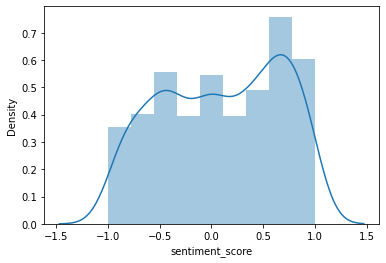

In [18]:
import seaborn as sn

sn.distplot(df_output['sentiment_score'])
plt.plot()

In [19]:

def pltvals(lst):

    vals = [0, 0, 0]
    for l in lst:
        if l < -0.5:
           
            vals[0] += 1
        elif l >= -0.5 and l <= 0.5 :
      
            vals[1] += 1
        else:
            vals[2] += 1
    return vals

vals = pltvals(df_output[ 'sentiment_score'])

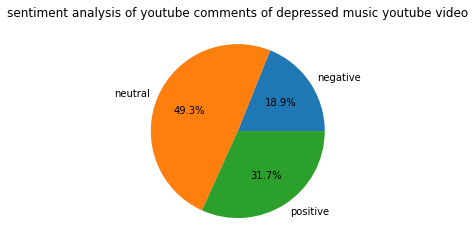

In [21]:
sentiment_labels = ["negative", "neutral", "positive"]
plt.title("sentiment analysis of youtube comments of depressed music youtube video")
plt.pie(vals, labels = sentiment_labels, autopct='%1.1f%%' )
plt.show()